# California Housig price
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity

In [1]:
#Objective - objective of this data to find out the Median house prices for California districts

In [2]:
#Import libaries--
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#import dataset
df = pd.read_csv("housing.csv")
display(df.head(10))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
#EDA Process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'longitude'),
  Text(1.5, 0, 'latitude'),
  Text(2.5, 0, 'housing_median_age'),
  Text(3.5, 0, 'total_rooms'),
  Text(4.5, 0, 'total_bedrooms'),
  Text(5.5, 0, 'population'),
  Text(6.5, 0, 'households'),
  Text(7.5, 0, 'median_income'),
  Text(8.5, 0, 'median_house_value'),
  Text(9.5, 0, 'ocean_proximity')])

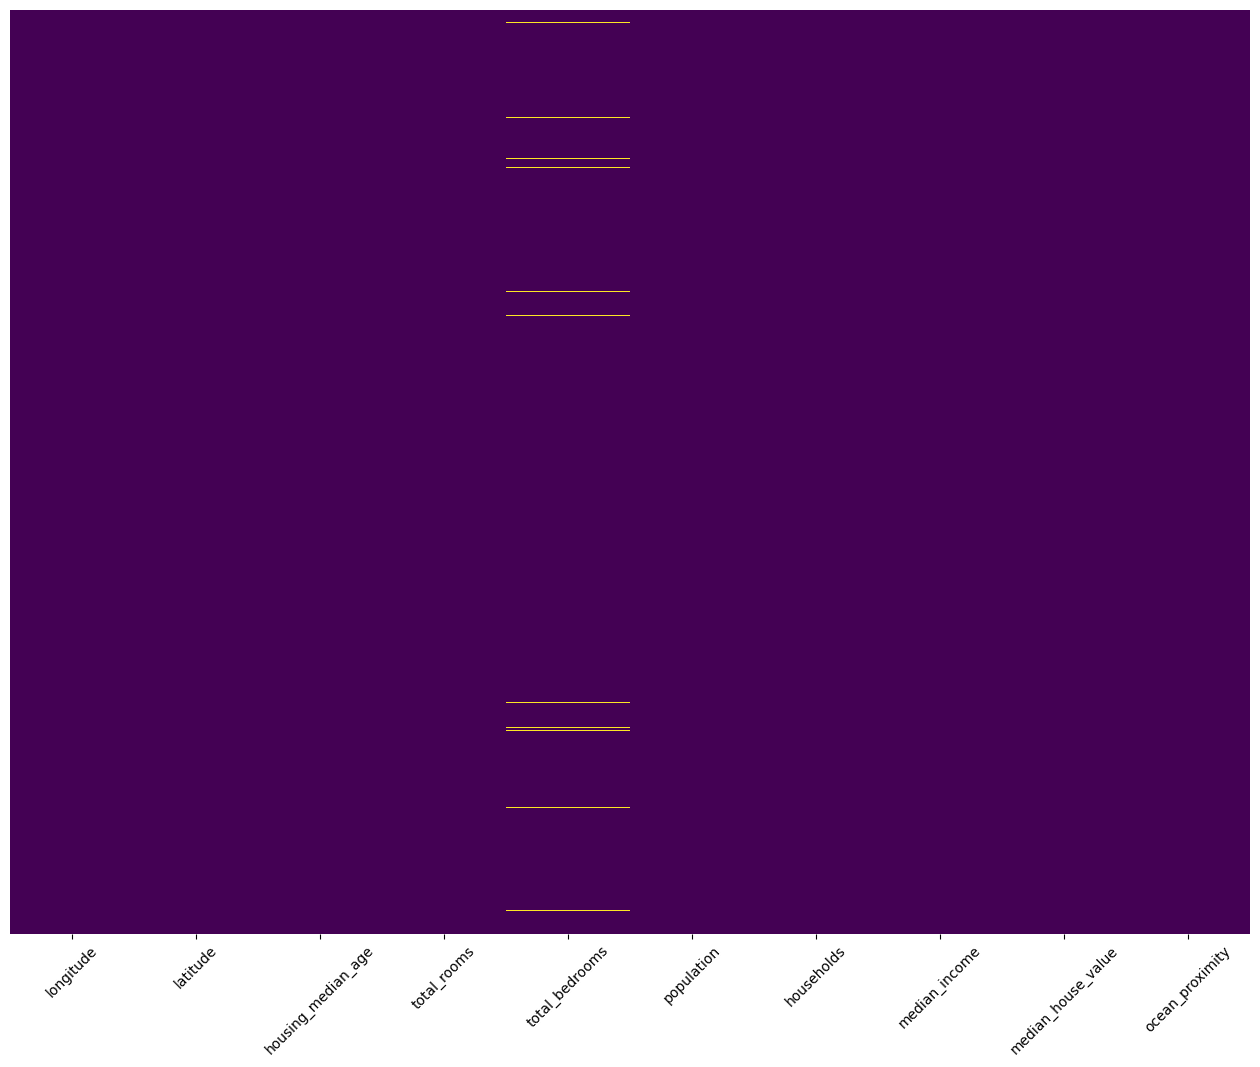

In [6]:
#plot missing values
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.xticks(rotation=45)

In [7]:
#observation-- In this dataset have some missing values in total_bedrooms column
#and ocean proximity variable is a object type variable 
#so, first i will fixed the missing values then 
#will apply one hot encoding for object type variable

# Visualization

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

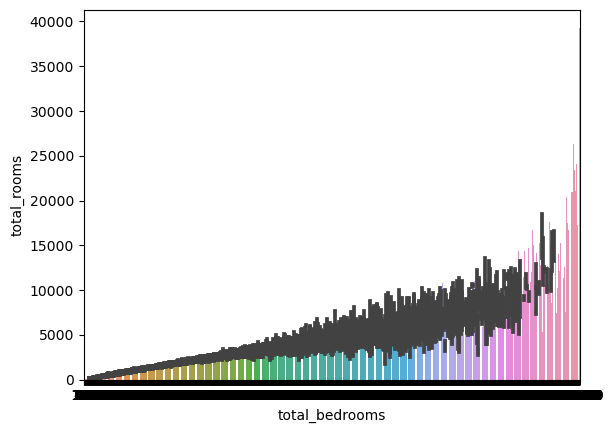

In [8]:
#barplot of total rooms and bedrooms
sns.barplot(x="total_bedrooms", y="total_rooms", data=df)

Text(0.5, 1.0, 'Total rooms and bedrooms distribution')

<Figure size 1600x1200 with 0 Axes>

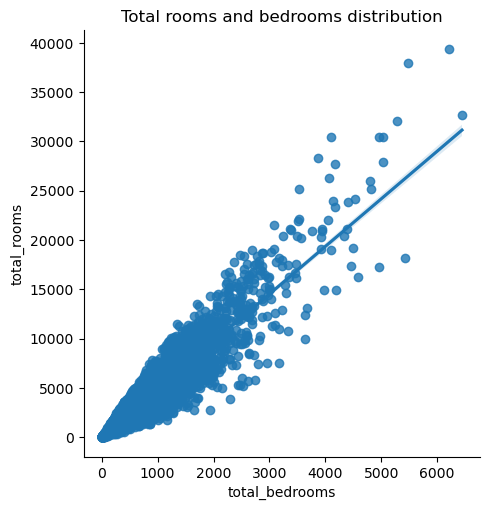

In [9]:
plt.figure(figsize=(16,12))
sns.lmplot(x="total_bedrooms", y="total_rooms", data=df)
plt.title("Total rooms and bedrooms distribution")

In [10]:
#Observation-- it seems like in total rooms variable have some outlier 
#let's check that with the help of boxplot

Text(0.5, 1.0, 'Outlier of total_rooms')

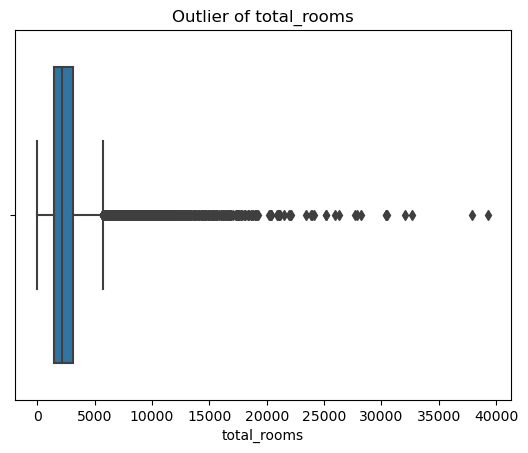

In [11]:
#boxplot-
sns.boxplot(x="total_rooms", data=df)
plt.title("Outlier of total_rooms")

<Figure size 1600x1200 with 0 Axes>

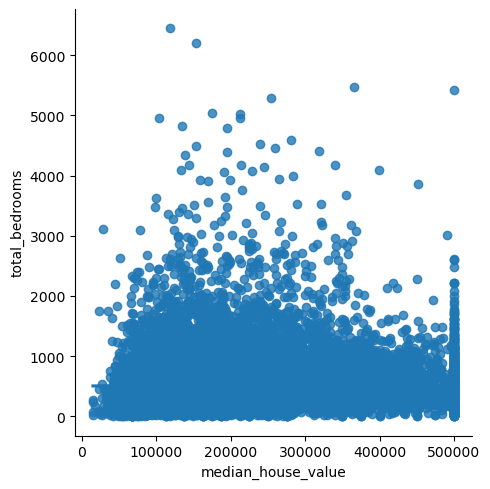

In [12]:
#Observation-- total rooms value have so much otlier its distributed randowmly
#so, lets check how median value increased with total bedrooms
plt.figure(figsize=(16,12))
sns.lmplot(x="median_house_value", y="total_bedrooms", data=df)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

<Figure size 2000x1600 with 0 Axes>

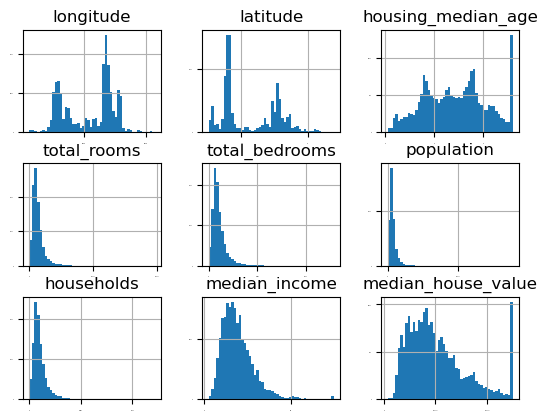

In [13]:
plt.figure(figsize=(20,16))
df.hist(bins=50,xlabelsize=False,ylabelsize=False)

Text(0.5, 1.0, 'median_income distribution')

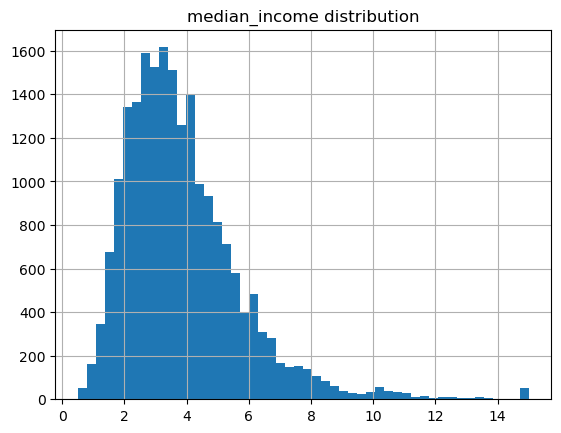

In [14]:
df.hist("median_income", bins=50)
plt.title("median_income distribution")

Text(0.5, 1.0, 'total_bedrooms distribution with households')

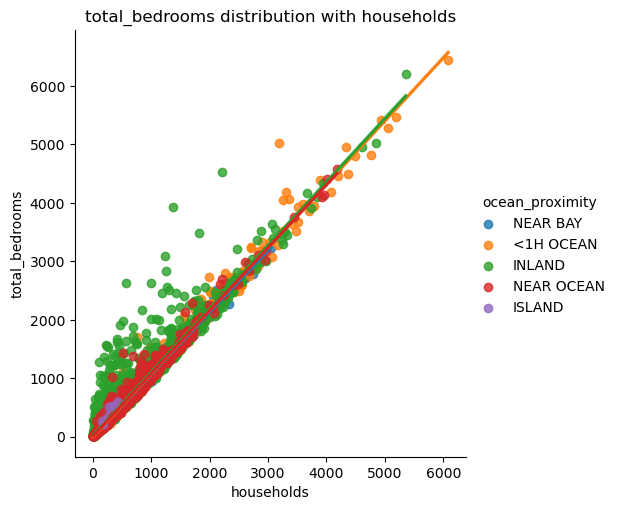

In [15]:
#Observation from hist plot we can  see that house_holds and
#total_bedrooms kinda same distribution so ,lets plot them together
sns.lmplot(x="households", y="total_bedrooms",hue='ocean_proximity', data=df)
plt.title("total_bedrooms distribution with households")

In [16]:
#Check mean and median and mode value of total_bedrooms

print('Mean of total_bedrooms',df.total_bedrooms.mean())

print('Median of total_bedrooms',df.total_bedrooms.median())

print('Mode of total_bedrooms',df.total_bedrooms.mode())

Mean of total_bedrooms 537.8705525375618
Median of total_bedrooms 435.0
Mode of total_bedrooms 0    280.0
dtype: float64


In [17]:
#observation total_bedrooms variable mean median 
#and mode is very different if we use this type of
#statistical opertaion to fixed the missing value then 
#dataset will be imbalance
#solution:- from previous lmplot we see that
#total_bedrooms and households variables have linear distribution so,
#in total-bedrooms column when missing values occur i will fixed those value with
#households value of same index

In [18]:
#fixed missing values--
tmp = (pd.isna(df["total_bedrooms"]))
df.total_bedrooms[tmp] = df["households"]
print("Fixed values:",tmp.sum())
print("Lets to fixed missing values:",df["total_bedrooms"].isnull().sum())

Fixed values: 207
Lets to fixed missing values: 0


In [19]:
#all missing values fixed of total_bedrooms variable
#lets check the correlationship of all variables--
corr_metrics = df.corr()
correlation=corr_metrics["median_house_value"].sort_values(ascending=False)
correlation

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.050688
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'longitude'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'housing_median_age'),
  Text(0, 3.5, 'total_rooms'),
  Text(0, 4.5, 'total_bedrooms'),
  Text(0, 5.5, 'population'),
  Text(0, 6.5, 'households'),
  Text(0, 7.5, 'median_income'),
  Text(0, 8.5, 'median_house_value')])

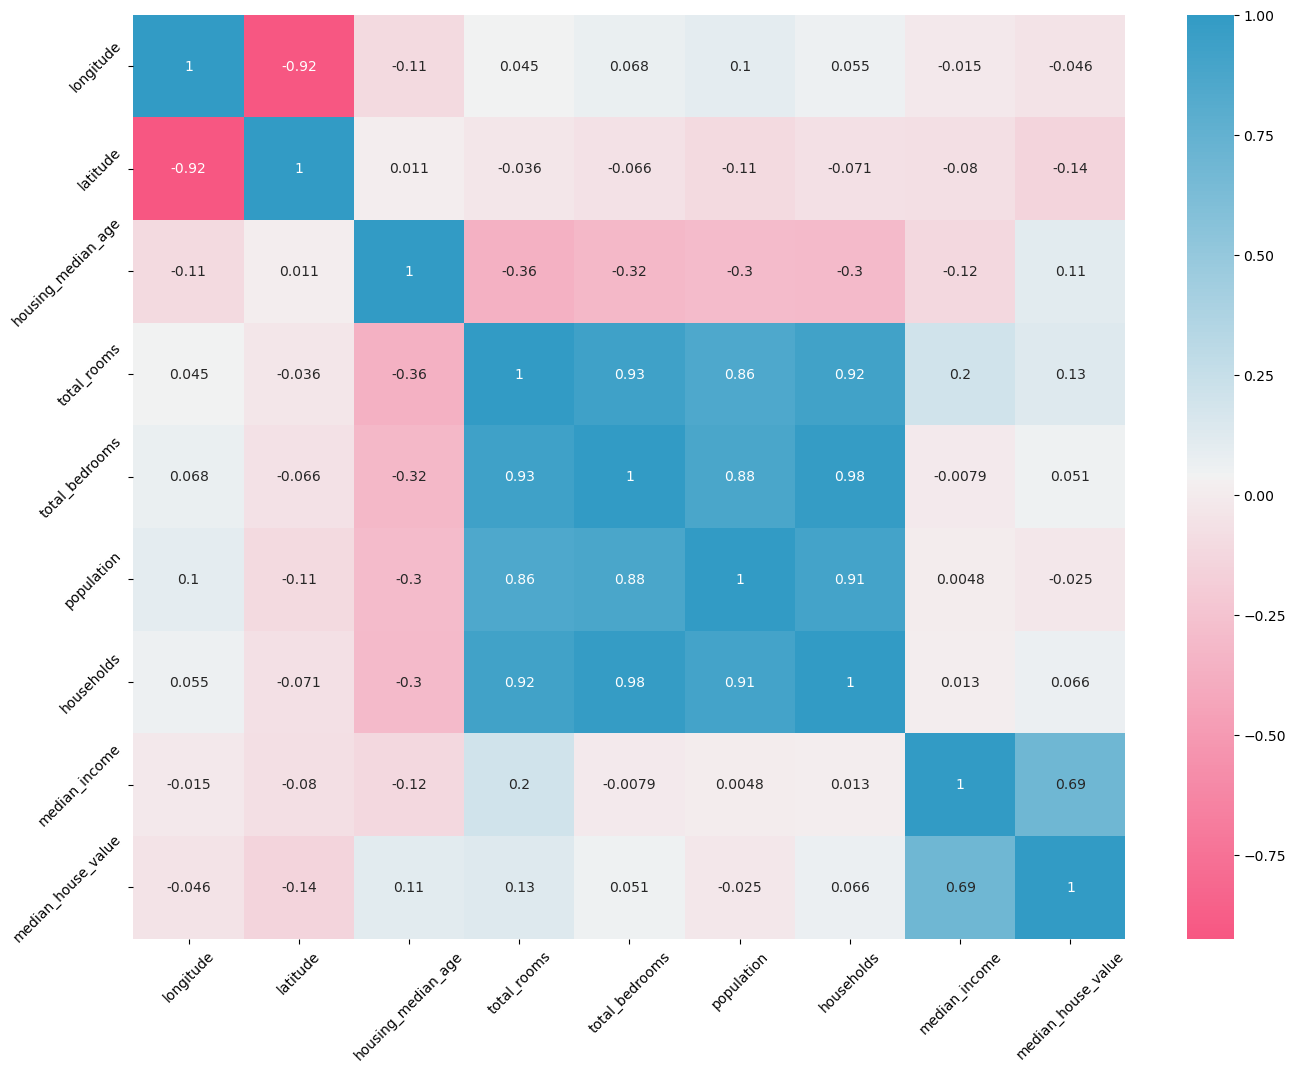

In [20]:
#let's plot this correlation--
plt.figure(figsize=(16,12))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)          
sns.heatmap(corr_metrics, annot=True, cmap=cmap)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [21]:
#observation-- There have only one strong correlation median_income 
#and lattitude is negatively correlated with median_house_value but not that much strong
#let's try to create some more attribute which can amke more sotrong correlation
#with labels(median_house_value)

In [22]:
#create new attributes
df["new_atrb"] = df["median_income"]*2 - df["latitude"] /2

In [23]:
#check new attributes correlation with labels
corr_metrics = df.corr()
correlation=corr_metrics["median_house_value"].sort_values(ascending=False)
correlation

median_house_value    1.000000
median_income         0.688075
new_atrb              0.687272
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.050688
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [24]:
#Let's build our model with this new attribute

In [25]:
#copy of df data
data =df.copy()

In [26]:
#Split the data into features and labels--
x = data.drop(columns={"median_house_value"},axis=1)
y = data["median_house_value"]
print("Features and labels are separated!")
#now split the data into train test and val
from sklearn.model_selection import train_test_split
x_old_train,x_test,y_old_train,y_test = train_test_split(x,y, test_size=0.1, random_state=42)
print("Test dataset prepared!")
#now again split the x_old_train and y_old_train into train and val data so we can perform
#gridsearchcv on val data
x_train,x_val,y_train,y_val=train_test_split(x_old_train,y_old_train, test_size=0.1, random_state=42)
print("Training and val dtaset prepared!")

#shape of all data
print("shape of x_train data:",x_train.shape)
print("shape of y_train data:",y_train.shape)
print("shape of x_test data:",x_test.shape)
print("shape of y_test data:",y_test.shape)
print("shape of x_val data:",x_val.shape)
print("shape of y_val data:",y_val.shape)

Features and labels are separated!
Test dataset prepared!
Training and val dtaset prepared!
shape of x_train data: (16718, 10)
shape of y_train data: (16718,)
shape of x_test data: (2064, 10)
shape of y_test data: (2064,)
shape of x_val data: (1858, 10)
shape of y_val data: (1858,)


# Pipeline Build
Build a piepline for categorical features and numerical features then combine them and will make a 
final pipline then add algorithm and grid search cv to get best params for algorithm
here i will use SVC algorithm for this daatset

In [27]:
#find the categorical variables in data set
cat_cols = [col for col in x_train.columns if (x_train[col].dtypes=='O') & (col!='education')]
print("List of categoricaal variables:",cat_cols)

#find the numerical variables in data set
num_col = [col for col in x_train.columns if data[col].dtypes!='O']
num_cols = list(num_col)
print("List of numerical variables:",num_cols)

List of categoricaal variables: ['ocean_proximity']
List of numerical variables: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'new_atrb']


In [30]:
#import pipelines----
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

#numerical piepline build--
num_pipeline = Pipeline([
    ("sim_imputer",SimpleImputer(strategy="mean")),
    ("std_scaler",StandardScaler())
])
print("Pipeline creation done for Numerical variables!")

#categorical pipeline build--
cat_pipeline = Pipeline([
    ("ohe",OneHotEncoder(handle_unknown='ignore'))
])
print("Pipeline creation done for categorical variables!")

#Combine of numerical and categorical pipeline
preprocessing_pipeline = ColumnTransformer([
    ("Numerical_pipeline",num_pipeline,num_cols),
    ("Categorical_pipeline",cat_pipeline,cat_cols),
])
print("Numerical and categorical pipeline combined!")

#add svc alorithm to final pipeline
model_pipeline = Pipeline([
    ("preprocessing",preprocessing_pipeline),
    ("RF_reg",RandomForestRegressor()),
    ("")
])
print("Added RandomForest algorithm to pipeline")

#preparing all features for feed the model
#preprocessing_pipeline.fit_transform(x_train)
#preprocessing_pipeline.transform(x_val)
#preprocessing_pipeline.transform(x_test)
#print("x_train data preprocessing done!")
#print("x_val data preprocessing done!")
#print("x_test data preprocessing done!")


#feed x_train data to the model
model_pipeline.fit(x_train,y_train)
print("Feed x_train and y_train data to model!")

#params for gridsearchcv [Randomforest regression]
param_grid = { 
    'RF_reg__n_estimators': [200, 500],
    'RF_reg__max_features': ['auto', 'sqrt', 'log2'],
    'RF_reg__max_depth' : [4,5,6,7,8],
    "RF_reg__min_samples_split" : [2,4,8],
    "RF_reg__bootstrap": [True, False],
}
RF_grd = GridSearchCV(model_pipeline, param_grid, cv = 5)

#params for gridsearchcv [SVC classifier]
#param_grid = {'support_vm__C':[1,10,100,1000],
 #             'support_vm__gamma':[1,0.1,0.001,0.0001],
  #            'support_vm__kernel':['linear','rbf']}
#print("Parameter creation done for Gridsearchcv.")

#svc_clf=SVC()        #SVC algorithm define

#add params for gridserach cv
#svc_grd = GridSearchCV(model_pipeline, param_grid, refit=True, verbose=3)

#feed val data to grid search cv
RF_grd.fit(x_val,y_val)

#print best estimators--
print("Best estimators:",RF_grd.best_estimator_)
#print best params
print("Best params:",RF_grd.best_params_)

Pipeline creation done for Numerical variables!
Pipeline creation done for categorical variables!
Numerical and categorical pipeline combined!
Added RandomForest algorithm to pipeline
Feed x_train and y_train data to model!
Best estimators: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Numerical_pipeline',
                                                  Pipeline(steps=[('sim_imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                 

In [31]:
#add best params to the model pipeline
model_pipeline=RF_grd.best_estimator_
print("Best estimator and best params fit to the model pipeline!")
#All best parameter added to the model
#now lets predict on test data and check error
y_test_prediction=model_pipeline.predict(x_test)
print("Prediction done on x_test data.")

Best estimator and best params fit to the model pipeline!
Prediction done on x_test data.


# Error Calculation

In [32]:
#import mean squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score

mae = mean_squared_error(y_test,y_test_prediction)
print("Mean squared error of the mdoel:",mae)

mse = mean_squared_error(y_test,y_test_prediction)
print("Mean squared error:",mse)

r2 = r2_score(y_test,y_test_prediction)
print("R2 score:",r2)

#recall = recall_score(y_test,y_test_prediction)
#print("Recall score:",recall)

Mean squared error of the mdoel: 3934642743.912157
Mean squared error: 3934642743.912157
R2 score: 0.7049628721691342


In [33]:
#make dataframe of actual and predicted value
Final_result = pd.DataFrame({"Actual":y_test,"Prediction":y_test_prediction})
display(Final_result.head(10))

,Actual,Prediction
20046,47700.0,61244.049161
3024,45800.0,91323.239528
15663,500001.0,405486.403638
20484,218600.0,273582.794450
9814,278000.0,242067.308180
13311,158700.0,164869.677434
7113,198200.0,209258.620729
7668,157500.0,180822.868591
18246,340000.0,244323.385233
5723,446600.0,487822.019295


# Features Importance

In [36]:
#Finding features importance
#feature_importances = RF_grd.best_estimator_.feature_importances_
#feature_importances 

#Let’s display these importance scores next to their corresponding attribute names:
#extra_attribs = ["Gender", "Class","Customer Type","Type of Travel"]
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
#attributes = num_attribs  + cat_one_hot_attribs
#sorted(zip(feature_importances, attributes), reverse=True)

# Model Pickleing

In [40]:
#import pickle
import pickle
pickle.dump(model_pipeline,open("california_house.pkl","wb"))
california_house_load=pickle.load(open("california_house.pkl","rb"))